In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_m1 = pd.read_excel('data/M1.xlsx')

# Features (X) and target (y)
X_m1 = data_m1.drop('WPR', axis=1)
y_m1 = data_m1['WPR']

# Split data into training and testing sets
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y_m1, test_size=0.2, random_state=42)


In [4]:
class ELM(BaseEstimator, RegressorMixin):
    def __init__(self, n_hidden=20):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.biases = None
        self.output_weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        # Randomly initialize input weights and biases
        self.input_weights = np.random.randn(X.shape[1], self.n_hidden)
        self.biases = np.random.randn(self.n_hidden)

        # Calculate hidden layer output
        H = self.sigmoid(np.dot(X, self.input_weights) + self.biases)

        # Calculate output weights (using Moore-Penrose pseudo-inverse)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

        return self

    def predict(self, X):
        H = self.sigmoid(np.dot(X, self.input_weights) + self.biases)
        return np.dot(H, self.output_weights)

# Initialize and train the ELM model
elm = ELM(n_hidden=20)
elm.fit(X_train_m1, y_train_m1)

# Predict and evaluate the model
y_train_pred_elm = elm.predict(X_train_m1)
y_test_pred_elm = elm.predict(X_test_m1)

mse_train_elm = mean_squared_error(y_train_m1, y_train_pred_elm)
mse_test_elm = mean_squared_error(y_test_m1, y_test_pred_elm)

print("ELM MSE (Train):", mse_train_elm)
print("ELM MSE (Test):", mse_test_elm)


ELM MSE (Train): 0.8880013376796757
ELM MSE (Test): 0.7826613626311693


/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [13]:
# Save the predictions
results_train_elm = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_elm})
results_test_elm = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_elm})

results_train_elm.to_excel('outputs/elm_train_predictions.xlsx', index=False)
results_test_elm.to_csv('outputs/elm_pso_test_predictions.xlsx', index=False)

In [14]:
# PSO Optimization
from pyswarm import pso

def pso_objective(params):
    n_hidden = int(params[0])
    elm = ELM(n_hidden=n_hidden)
    elm.fit(X_train_m1, y_train_m1)
    y_pred = elm.predict(X_test_m1)
    return mean_squared_error(y_test_m1, y_pred)

lb = [10]  # lower bound
ub = [100]  # upper bound

best_params_pso, best_mse_pso = pso(pso_objective, lb, ub, swarmsize=50, maxiter=100)
best_n_hidden_pso = int(best_params_pso[0])

print("Best n_hidden from PSO:", best_n_hidden_pso)
print("Best MSE from PSO:", best_mse_pso)

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

Stopping search: maximum iterations reached --> 100
Best n_hidden from PSO: 41
Best MSE from PSO: 0.6032802430193484


In [15]:
# Train with PSO optimized parameters
elm_pso = ELM(n_hidden=best_n_hidden_pso)
elm_pso.fit(X_train_m1, y_train_m1)

y_train_pred_pso = elm_pso.predict(X_train_m1)
y_test_pred_pso = elm_pso.predict(X_test_m1)

mse_train_pso = mean_squared_error(y_train_m1, y_train_pred_pso)
mse_test_pso = mean_squared_error(y_test_m1, y_test_pred_pso)

print("PSO Optimized ELM MSE (Train):", mse_train_pso)
print("PSO Optimized ELM MSE (Test):", mse_test_pso)

# Save the predictions
results_train_pso = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_pso})
results_test_pso = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_pso})

results_train_pso.to_excel('outputs/elm_pso_train_predictions.xlsx', index=False)
results_test_pso.to_excel('outputs/elm_pso_test_predictions.xlsx', index=False)

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


PSO Optimized ELM MSE (Train): 0.8679245729209053
PSO Optimized ELM MSE (Test): 0.8629605522987526


ValueError: No engine for filetype: 'csv'

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|_________________________________________________ 1.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|_________________________________________________ 2.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||________________________________________________ 3.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||________________________________________________ 4.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||_______________________________________________ 5.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||_______________________________________________ 6.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||______________________________________________ 7.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||______________________________________________ 8.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||_____________________________________________ 10.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||____________________________________________ 11.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||____________________________________________ 12.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||___________________________________________ 13.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||___________________________________________ 14.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||__________________________________________ 15.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||__________________________________________ 16.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||_________________________________________ 17.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||_________________________________________ 18.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||________________________________________ 20.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||_______________________________________ 21.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||_______________________________________ 22.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||______________________________________ 23.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||______________________________________ 24.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||_____________________________________ 25.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||_____________________________________ 26.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||____________________________________ 27.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||____________________________________ 28.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||___________________________________ 30.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||__________________________________ 31.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||__________________________________ 32.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||_________________________________ 33.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||_________________________________ 34.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||________________________________ 35.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||________________________________ 36.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||_______________________________ 37.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||_______________________________ 38.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||______________________________ 40.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||_____________________________ 41.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||_____________________________ 42.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||____________________________ 43.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||____________________________ 44.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||___________________________ 45.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||___________________________ 46.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||__________________________ 47.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||__________________________ 48.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||_________________________ 50.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||________________________ 51.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||________________________ 52.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||_______________________ 53.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||_______________________ 54.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||______________________ 55.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||______________________ 56.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||_____________________ 57.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||_____________________ 58.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||___________________ 61.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||___________________ 62.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||__________________ 63.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||__________________ 64.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||_________________ 65.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||_________________ 66.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||________________ 67.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||________________ 68.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||______________ 71.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||______________ 72.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||_____________ 73.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||_____________ 74.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||____________ 75.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||____________ 76.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||___________ 77.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||___________ 78.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||_________ 81.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||_________ 82.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||________ 83.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||________ 84.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||_______ 85.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||_______ 86.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||||______ 87.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||||______ 88.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||||||____ 91.1% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||||||____ 92.2% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||||||___ 93.3% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||||||___ 94.4% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||||||||__ 95.6% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

||||||||||||||||||||||||||||||||||||||||||||||||__ 96.7% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||||||||_ 97.8% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.9% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

 The best solution found:                                                                           
 [40.]

 Objective function:
 0.6024373828780031


/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


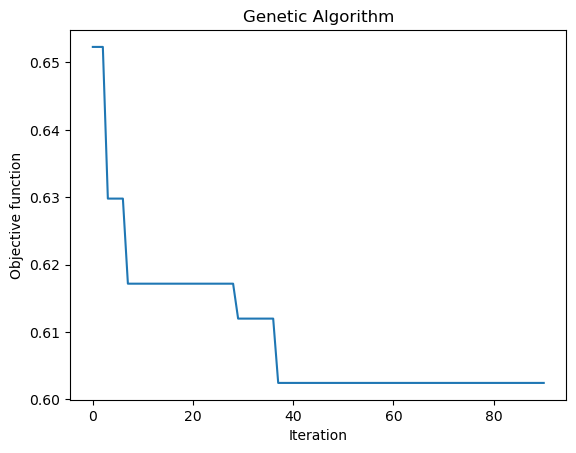

Best n_hidden from GA: 40
Best MSE from GA: 0.6024373828780031


In [7]:
#Optimization using Genetic Algorithm
from geneticalgorithm import geneticalgorithm as ga

# Define the objective function for GA
def ga_objective(params):
    n_hidden = int(params[0])
    elm = ELM(n_hidden=n_hidden)
    elm.fit(X_train_m1, y_train_m1)
    y_pred = elm.predict(X_test_m1)
    return mean_squared_error(y_test_m1, y_pred)

# Define the variable bounds
varbound = np.array([[10, 100]])

# Set up the GA model
model = ga(function=ga_objective, dimension=1, variable_type='int', variable_boundaries=varbound)

# Run the GA optimization
model.run()

best_n_hidden_ga = int(model.output_dict['variable'][0])
best_mse_ga = model.output_dict['function']

print("Best n_hidden from GA:", best_n_hidden_ga)
print("Best MSE from GA:", best_mse_ga)


In [17]:
# Train with GA optimized parameters
elm_ga = ELM(n_hidden=best_n_hidden_ga)
elm_ga.fit(X_train_m1, y_train_m1)

y_train_pred_ga = elm_ga.predict(X_train_m1)
y_test_pred_ga = elm_ga.predict(X_test_m1)

mse_train_ga = mean_squared_error(y_train_m1, y_train_pred_ga)
mse_test_ga = mean_squared_error(y_test_m1, y_test_pred_ga)

print("GA Optimized ELM MSE (Train):", mse_train_ga)
print("GA Optimized ELM MSE (Test):", mse_test_ga)

# Save the predictions
results_train_ga = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_ga})
results_test_ga = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_ga})

results_train_ga.to_excel('outputs/elm_ga_train_predictions.xlsx', index=False)
results_test_ga.to_excel('outputs/elm_ga_test_predictions.xlsx', index=False)


/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


GA Optimized ELM MSE (Train): 0.8138031763512372
GA Optimized ELM MSE (Test): 0.914098731729617


In [10]:
from niapy.algorithms.basic import HarrisHawksOptimization
from niapy.task import Task
from niapy.problems import Problem

# Define the custom benchmark for HHO
class CustomELMBenchmark(Problem):
    def __init__(self):
        super().__init__(dimension=1, lower=10, upper=100)

    def _evaluate(self, x):
        n_hidden = int(x[0])
        elm = ELM(n_hidden=n_hidden)
        elm.fit(X_train_m1, y_train_m1)
        y_pred = elm.predict(X_test_m1)
        return mean_squared_error(y_test_m1, y_pred)

# Define the task and algorithm
task = Task(problem=CustomELMBenchmark(), max_evals=100)
algo = HarrisHawksOptimization(population_size=30)

# Run the HHO optimization
best_params_hho, best_mse_hho = algo.run(task)
best_n_hidden_hho = int(best_params_hho[0])

print("Best n_hidden from HHO:", best_n_hidden_hho)
print("Best MSE from HHO:", best_mse_hho)


/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / 

Best n_hidden from HHO: 18
Best MSE from HHO: 0.6400536517678231


/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [19]:
# Train with HHO optimized parameters
elm_hho = ELM(n_hidden=best_n_hidden_hho)
elm_hho.fit(X_train_m1, y_train_m1)

y_train_pred_hho = elm_hho.predict(X_train_m1)
y_test_pred_hho = elm_hho.predict(X_test_m1)

mse_train_hho = mean_squared_error(y_train_m1, y_train_pred_hho)
mse_test_hho = mean_squared_error(y_test_m1, y_test_pred_hho)

print("HHO Optimized ELM MSE (Train):", mse_train_hho)
print("HHO Optimized ELM MSE (Test):", mse_test_hho)

# Save the predictions
results_train_hho = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_hho})
results_test_hho = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_hho})

results_train_hho.to_excel('outputs/elm_hho_train_predictions.xlsx', index=False)
results_test_hho.to_excel('outputs/elm_hho_test_predictions.xlsx', index=False)

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


HHO Optimized ELM MSE (Train): 0.8952705039205147
HHO Optimized ELM MSE (Test): 0.7888287446207194


In [11]:
import optuna

# Define the objective function for Optuna
def bbo_objective(trial):
    n_hidden = trial.suggest_int("n_hidden", 10, 100)
    elm = ELM(n_hidden=n_hidden)
    elm.fit(X_train_m1, y_train_m1)
    y_pred = elm.predict(X_test_m1)
    return mean_squared_error(y_test_m1, y_pred)

# Create a study object and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(bbo_objective, n_trials=100)

# Best parameters and the corresponding MSE
best_n_hidden_bbo = study.best_params['n_hidden']
best_mse_bbo = study.best_value

print("Best n_hidden from BBO (Optuna):", best_n_hidden_bbo)
print("Best MSE from BBO (Optuna):", best_mse_bbo)


/home/wakili/anaconda3/envs/mlenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-08-31 16:55:06,103] A new study created in memory with name: no-name-456e7df3-5f9d-4e47-ab98-3ee9b93ac000
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
[I 2024-08-31 16:55:06,343] Trial 0 finished with value: 9734.253493311153 and parameters: {'n_hidden': 76}. Best is trial 0 with value: 9734.253493311153.
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
[I 2024-08-31 16:55:06,456] Trial 1 finished with value: 1.2949903349200313 and parameters: {'n_hidden': 51}. Best is trial 1 with value: 1.2949903349200313.
/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in 

Best n_hidden from BBO (Optuna): 34
Best MSE from BBO (Optuna): 0.6413672401736886


In [22]:
# Train with BBO optimized parameters
elm_bbo = ELM(n_hidden=best_n_hidden_bbo)
elm_bbo.fit(X_train_m1, y_train_m1)

y_train_pred_bbo = elm_bbo.predict(X_train_m1)
y_test_pred_bbo = elm_bbo.predict(X_test_m1)

mse_train_bbo = mean_squared_error(y_train_m1, y_train_pred_bbo)
mse_test_bbo = mean_squared_error(y_test_m1, y_test_pred_bbo)

print("BBO (Optuna) Optimized ELM MSE (Train):", mse_train_bbo)
print("BBO (Optuna) Optimized ELM MSE (Test):", mse_test_bbo)

# Save the predictions
results_train_bbo = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_bbo})
results_test_bbo = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_bbo})

results_train_bbo.to_excel('outputs/elm_bbo_train_predictions.xlsx', index=False)
results_test_bbo.to_excel('outputs/elm_bbo_test_predictions.xlsx', index=False)

/tmp/ipykernel_256836/2902025539.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


BBO (Optuna) Optimized ELM MSE (Train): 0.8264284706225187
BBO (Optuna) Optimized ELM MSE (Test): 0.7185904570599169
